In [10]:
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install scikit-image


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.io import imread
from skimage.transform import resize

# Chemin vers les dossiers contenant les images
real_images_dir = "dataset/1000/real_cropped/"
ai_images_dir = "dataset/1000/fake_cropped/"

# Lire et redimensionner les images de 1024x994 en 256x248
def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        image = imread(os.path.join(directory, filename))
        image = resize(image, (256, 248)) # Redimensionner en 256x248
        images.append(image)
    return images

real_images = load_images(real_images_dir)
ai_images = load_images(ai_images_dir)

# Créer les étiquettes (labels) pour les images
real_labels = [0] * len(real_images)
ai_labels = [1] * len(ai_images)

# Concaténer les images et les étiquettes
X = np.concatenate((real_images, ai_images))
y = np.concatenate((real_labels, ai_labels))

# Aplatir les images en vecteurs
X = X.reshape(X.shape[0], -1)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = svm.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle :", accuracy)

Précision du modèle : 0.9475


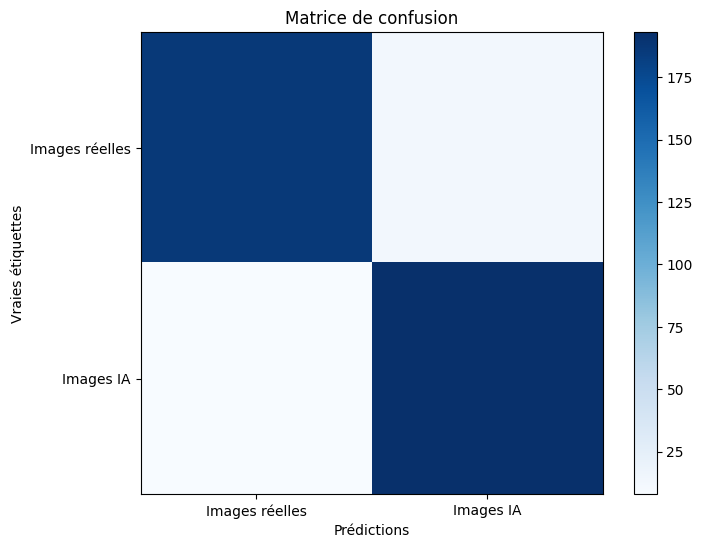

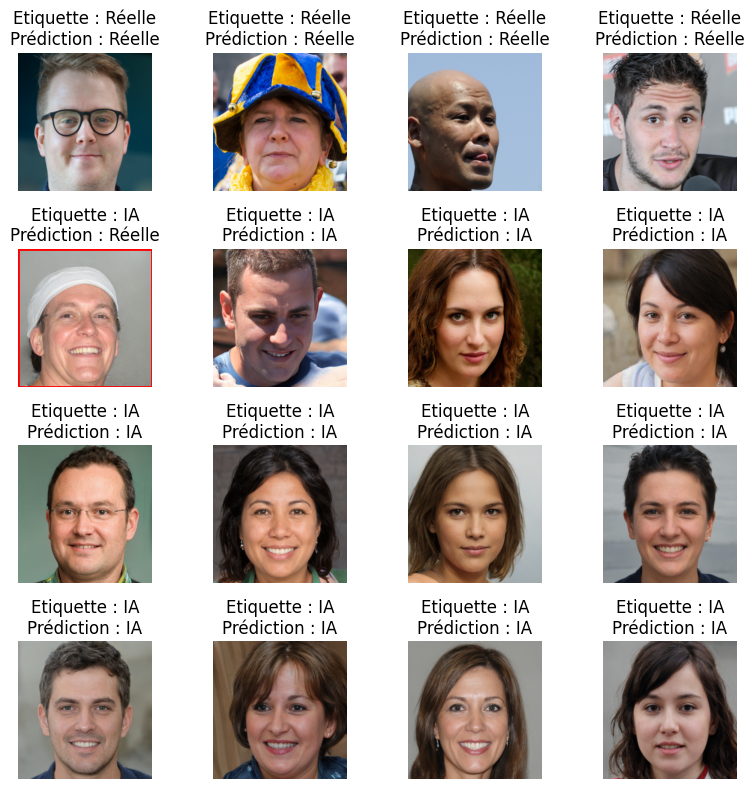

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.metrics import confusion_matrix
# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(set(y)))
plt.xticks(tick_marks, ["Images réelles", "Images IA"])
plt.yticks(tick_marks, ["Images réelles", "Images IA"])
plt.xlabel("Prédictions")
plt.ylabel("Vraies étiquettes")
plt.show()

# Afficher quelques exemples d'images réelles et d'images IA avec leurs prédictions
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
real_indices = np.where(y_test == 0)[0]
ai_indices = np.where(y_test == 1)[0]

for i, ax in enumerate(axes.flat):
    if i < 4:
        index = real_indices[i]
        label = "Réelle"
    else:
        index = ai_indices[i - 4]
        label = "IA"
    
    image = X_test[index].reshape(256, 248, -1)
    prediction = "Réelle" if y_pred[index] == 0 else "IA"
    
    ax.imshow(image)
    ax.set_title(f"Etiquette : {label}\nPrédiction : {prediction}")
    ax.axis("off")

    # Changer la couleur du fond des images mal classifiées
    if (label == "Réelle" and y_pred[index] == 1) or (label == "IA" and y_pred[index] == 0):
        # Create a rectangle and add it to the axes
        rect = patches.Rectangle((0, 0), image.shape[1], image.shape[0], linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    
    ax.axis("off")

plt.tight_layout()
plt.show()

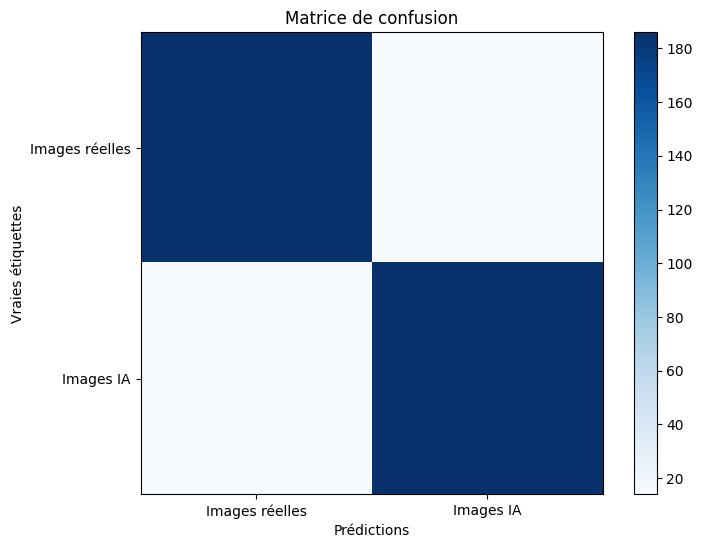

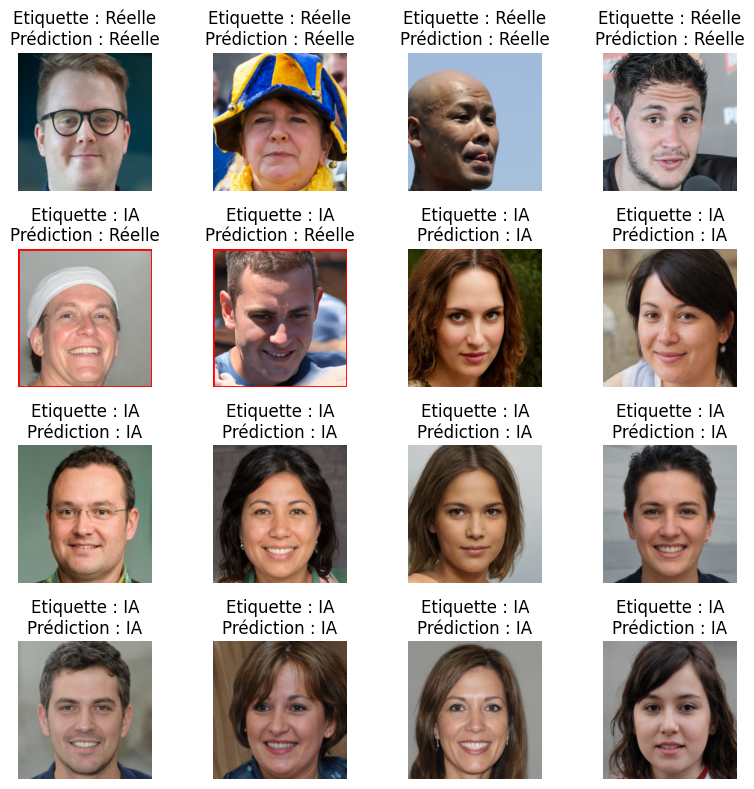

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.metrics import confusion_matrix
# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(set(y)))
plt.xticks(tick_marks, ["Images réelles", "Images IA"])
plt.yticks(tick_marks, ["Images réelles", "Images IA"])
plt.xlabel("Prédictions")
plt.ylabel("Vraies étiquettes")
plt.show()

# Afficher quelques exemples d'images réelles et d'images IA avec leurs prédictions
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
real_indices = np.where(y_test == 0)[0]
ai_indices = np.where(y_test == 1)[0]

for i, ax in enumerate(axes.flat):
    if i < 4:
        index = real_indices[i]
        label = "Réelle"
    else:
        index = ai_indices[i - 4]
        label = "IA"
    
    image = X_test[index].reshape(256, 248, -1)
    prediction = "Réelle" if y_pred[index] == 0 else "IA"
    
    ax.imshow(image)
    ax.set_title(f"Etiquette : {label}\nPrédiction : {prediction}")
    ax.axis("off")

    # Changer la couleur du fond des images mal classifiées
    if (label == "Réelle" and y_pred[index] == 1) or (label == "IA" and y_pred[index] == 0):
        # Create a rectangle and add it to the axes
        rect = patches.Rectangle((0, 0), image.shape[1], image.shape[0], linewidth=2, edgecolor='r', facecolor='none')

        ax.add_patch(rect)
    
    ax.axis("off")

plt.tight_layout()
plt.show()

Précision de l'arbre de décision : 0.7025


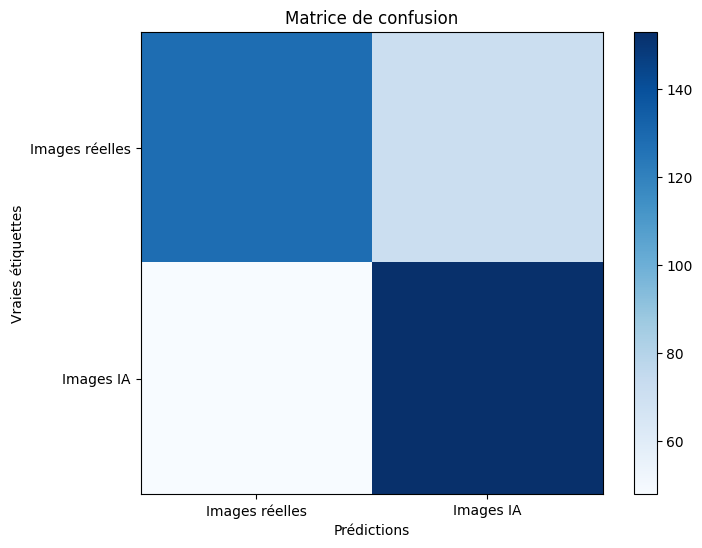

Précision de la forêt aléatoire : 0.86


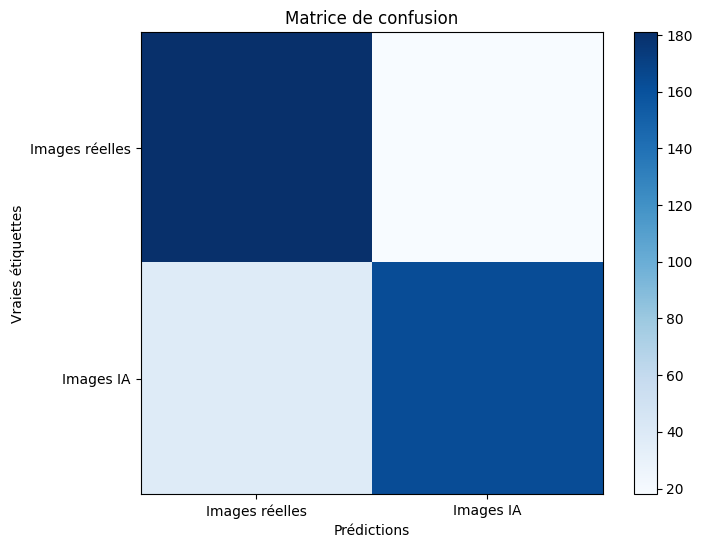

In [15]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from skimage.io import imread
from skimage.transform import resize

# Lire et redimensionner les images
def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        image = imread(os.path.join(directory, filename))
        image = resize(image, (256, 248))  # Redimensionner les images à une taille fixe 
        images.append(image)
    return images

real_images = load_images(real_images_dir)
ai_images = load_images(ai_images_dir)

# Créer les étiquettes (labels) pour les images
real_labels = [0] * len(real_images)
ai_labels = [1] * len(ai_images)

# Concaténer les images et les étiquettes
X = np.concatenate((real_images, ai_images))
y = np.concatenate((real_labels, ai_labels))

# Aplatir les images en vecteurs
X = X.reshape(X.shape[0], -1)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner l'arbre de décision
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test avec l'arbre de décision
y_pred_dt = decision_tree.predict(X_test)

# Calculer la précision de l'arbre de décision
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Précision de l'arbre de décision :", accuracy_dt)


#matrice de confusion
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.metrics import confusion_matrix
# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(set(y)))
plt.xticks(tick_marks, ["Images réelles", "Images IA"])
plt.yticks(tick_marks, ["Images réelles", "Images IA"])
plt.xlabel("Prédictions")
plt.ylabel("Vraies étiquettes")
plt.show()



# Créer et entraîner la forêt aléatoire
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test avec la forêt aléatoire
y_pred_rf = random_forest.predict(X_test)

# Calculer la précision de la forêt aléatoire
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Précision de la forêt aléatoire :", accuracy_rf)

# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(set(y)))
plt.xticks(tick_marks, ["Images réelles", "Images IA"])
plt.yticks(tick_marks, ["Images réelles", "Images IA"])
plt.xlabel("Prédictions")
plt.ylabel("Vraies étiquettes")
plt.show()


Précision du modèle : 0.96


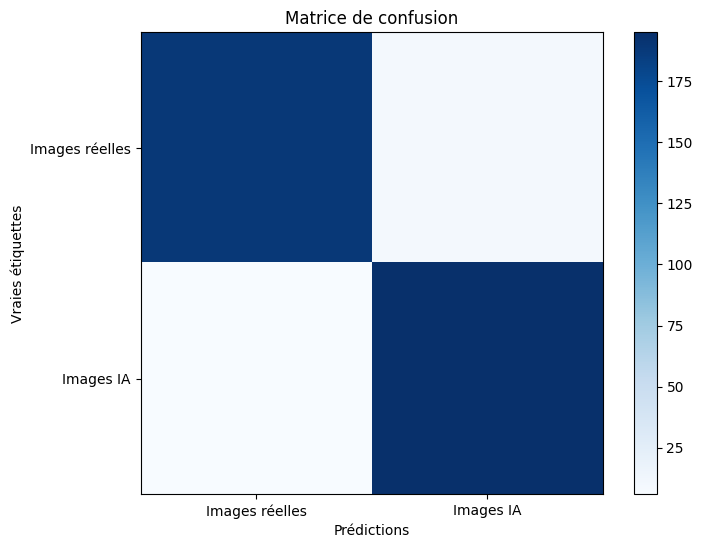

In [20]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from skimage.io import imread
from skimage.transform import resize

# Lire et redimensionner les images
def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        image = imread(os.path.join(directory, filename))
        image = resize(image, (256, 248))  # Redimensionner les images à une taille fixe 
        images.append(image)
    return images

real_images = load_images(real_images_dir)
ai_images = load_images(ai_images_dir)

# Créer les étiquettes (labels) pour les images
real_labels = [0] * len(real_images)
ai_labels = [1] * len(ai_images)

# Concaténer les images et les étiquettes
X = np.concatenate((real_images, ai_images))
y = np.concatenate((real_labels, ai_labels))

# Aplatir les images en vecteurs
X = X.reshape(X.shape[0], -1)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de régression logistique
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = logreg.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle :", accuracy)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(set(y)))
plt.xticks(tick_marks, ["Images réelles", "Images IA"])
plt.yticks(tick_marks, ["Images réelles", "Images IA"])
plt.xlabel("Prédictions")
plt.ylabel("Vraies étiquettes")
plt.show()

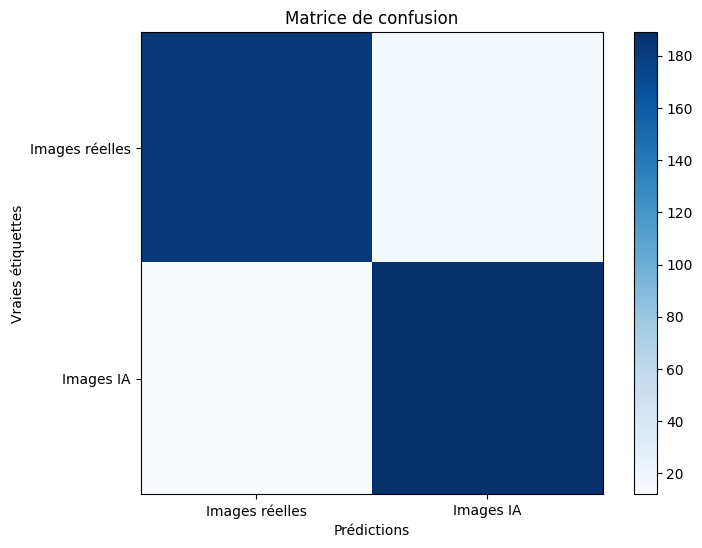

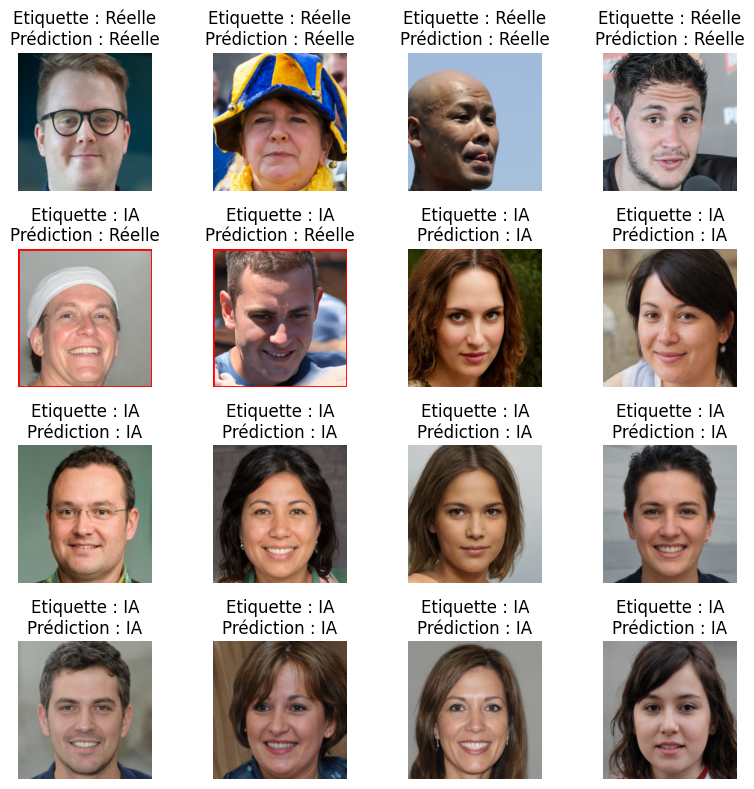

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.metrics import confusion_matrix
# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(set(y)))
plt.xticks(tick_marks, ["Images réelles", "Images IA"])
plt.yticks(tick_marks, ["Images réelles", "Images IA"])
plt.xlabel("Prédictions")
plt.ylabel("Vraies étiquettes")
plt.show()

# Afficher quelques exemples d'images réelles et d'images IA avec leurs prédictions
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
real_indices = np.where(y_test == 0)[0]
ai_indices = np.where(y_test == 1)[0]

for i, ax in enumerate(axes.flat):
    if i < 4:
        index = real_indices[i]
        label = "Réelle"
    else:
        index = ai_indices[i - 4]
        label = "IA"
    
    image = X_test[index].reshape(256, 248, -1)
    prediction = "Réelle" if y_pred[index] == 0 else "IA"
    
    ax.imshow(image)
    ax.set_title(f"Etiquette : {label}\nPrédiction : {prediction}")
    ax.axis("off")

    # Changer la couleur du fond des images mal classifiées
    if (label == "Réelle" and y_pred[index] == 1) or (label == "IA" and y_pred[index] == 0):
        # Create a rectangle and add it to the axes
        rect = patches.Rectangle((0, 0), image.shape[1], image.shape[0], linewidth=2, edgecolor='r', facecolor='none')

        ax.add_patch(rect)
    
    ax.axis("off")

plt.tight_layout()
plt.show()

C:\Users\leobo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 271ms/step - accuracy: 0.5674 - loss: 1.1933
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 278ms/step - accuracy: 0.7506 - loss: 0.5240
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 283ms/step - accuracy: 0.8899 - loss: 0.3194
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 281ms/step - accuracy: 0.9189 - loss: 0.1949
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 283ms/step - accuracy: 0.9643 - loss: 0.0876
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 286ms/step - accuracy: 0.9708 - loss: 0.0746
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 284ms/step - accuracy: 0.9938 - loss: 0.0236
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 284ms/step - accuracy: 0.9847 - loss: 0.0337
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 288ms/step - accuracy: 0.9970 - loss: 0.0137
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 298ms/step - accuracy: 0.9986 - loss: 0.0052
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 303ms/step - accuracy: 0.9989 - loss: 0.0052
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 14

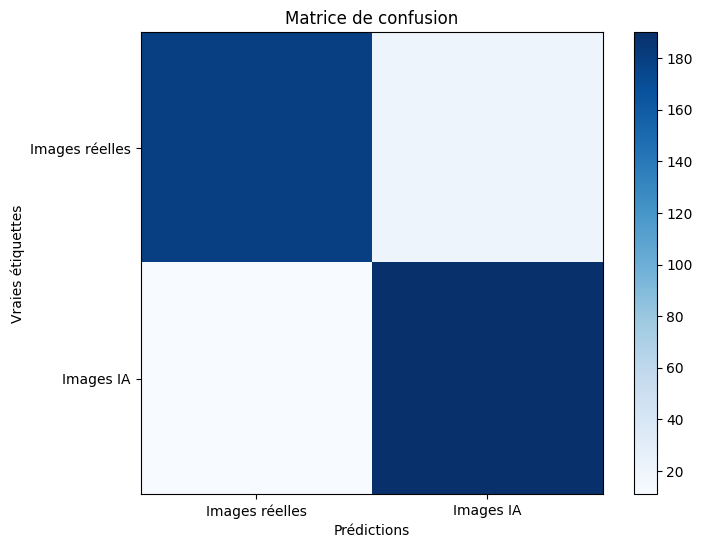

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Chemin vers les dossiers contenant les images
real_images_dir = "dataset/1000/real"
ai_images_dir = "dataset/1000/fake"

# Lire et redimensionner les images
def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        image = imread(os.path.join(directory, filename))
        image = resize(image, (256, 256))  # Redimensionner les images à une taille fixe
        images.append(image)
    return images

real_images = load_images(real_images_dir)
ai_images = load_images(ai_images_dir)

# Créer les étiquettes (labels) pour les images
real_labels = [0] * len(real_images)
ai_labels = [1] * len(ai_images)

# Concaténer les images et les étiquettes
X = np.concatenate((real_images, ai_images))
y = np.concatenate((real_labels, ai_labels))

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle :", accuracy)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(set(y)))
plt.xticks(tick_marks, ["Images réelles", "Images IA"])
plt.yticks(tick_marks, ["Images réelles", "Images IA"])
plt.xlabel("Prédictions")
plt.ylabel("Vraies étiquettes")
plt.show()